10가지의 의류(0~9)를 예측하는 다중 분류 문제


데이터 준비하기

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


데이터 그려보기

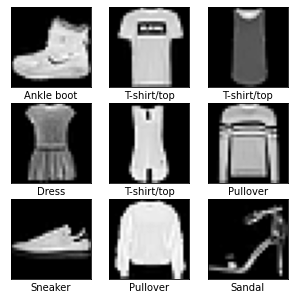

In [3]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

# Fashion-MNIST의 레이블에 해당하는 품목입니다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
# 0 ~ 59999의 범위에서 무작위로 9개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size=sample_size) 

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

전처리 및 검증 데이터셋 만들기

In [4]:
# 값의 범위를 0~1 사이로 만들기 -> 스케일링 -> minmax 알고리즘

x_train = x_train / 255
x_test = x_test / 255

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [5]:
# 레이블 (정답지) 범주형 데이터로 변경
from tensorflow.keras.utils import to_categorical

# 실제 정답 비교를 위해 0-9 정답지 따로 저장
real_y_test = y_test

# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# 검증 데이터 세트 만들기
from sklearn.model_selection import train_test_split

# 훈련/검증 데이터를 7:3 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3,
                                                  random_state = 777)

첫 번쨰 모델 구성하기

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

first_model = Sequential()

first_model.add(Flatten(input_shape = (28, 28)))  # Flatten(28, 28)함수 -> .(28 * 28) -> 1차원 784로 변환
first_model.add(Dense(64, activation = 'relu'))
first_model.add(Dense(32, activation = 'relu'))
first_model.add(Dense(10, activation = 'softmax'))

첫 번째 모델 설정하기

In [10]:
first_model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']) # == 'acc'

첫 번째 모델 학습시키기

In [11]:
first_history = first_model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 128,
                    validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 5ms/step - loss: 0.6622 - accuracy: 0.7747 - val_loss: 0.4801 - val_accuracy: 0.8344
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4442 - accuracy: 0.8446 - val_loss: 0.4192 - val_accuracy: 0.8568
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4087 - accuracy: 0.8574 - val_loss: 0.3903 - val_accuracy: 0.8643
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3801 - accuracy: 0.8663 - val_loss: 0.4047 - val_accuracy: 0.8533
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3650 - accuracy: 0.8694 - val_loss: 0.3672 - val_accuracy: 0.8712
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3460 - accuracy: 0.8753 - val_loss: 0.3732 - val_accuracy: 0.8652
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3358 - accuracy: 0.8793 - val_loss: 0.3473 - val_accuracy: 0.8781
Epoch 

두 번째 모델

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

second_model = Sequential()

second_model.add(Flatten(input_shape = (28, 28)))  # Flatten(28, 28)함수 -> .(28 * 28) -> 1차원 784로 변환
second_model.add(Dense(128, activation = 'relu'))  # 기존 모델보다 층 하나 더 추가
second_model.add(Dense(64, activation = 'relu'))
second_model.add(Dense(32, activation = 'relu'))
second_model.add(Dense(10, activation = 'softmax'))

second_model.compile(loss = 'categorical_crossentropy', # 손실 함수: categorical_crossentropy
              optimizer = 'adam',                       # 옵티마이저: Adam
              metrics = ['accuracy']) # == 'acc'

second_history = second_model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 128,
                    validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 5ms/step - loss: 0.6096 - accuracy: 0.7910 - val_loss: 0.4512 - val_accuracy: 0.8385
Epoch 2/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4239 - accuracy: 0.8489 - val_loss: 0.4113 - val_accuracy: 0.8529
Epoch 3/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3787 - accuracy: 0.8662 - val_loss: 0.3763 - val_accuracy: 0.8655
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3460 - accuracy: 0.8741 - val_loss: 0.3379 - val_accuracy: 0.8793
Epoch 5/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3253 - accuracy: 0.8821 - val_loss: 0.3465 - val_accuracy: 0.8732
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3095 - accuracy: 0.8857 - val_loss: 0.3391 - val_accuracy: 0.8766
Epoch 7/30
329/329 [==============================] - 2s 5ms/step - loss: 0.2947 - accuracy: 0.8907 - val_loss: 0.3450 - val_accuracy: 0.8756
Epoch 

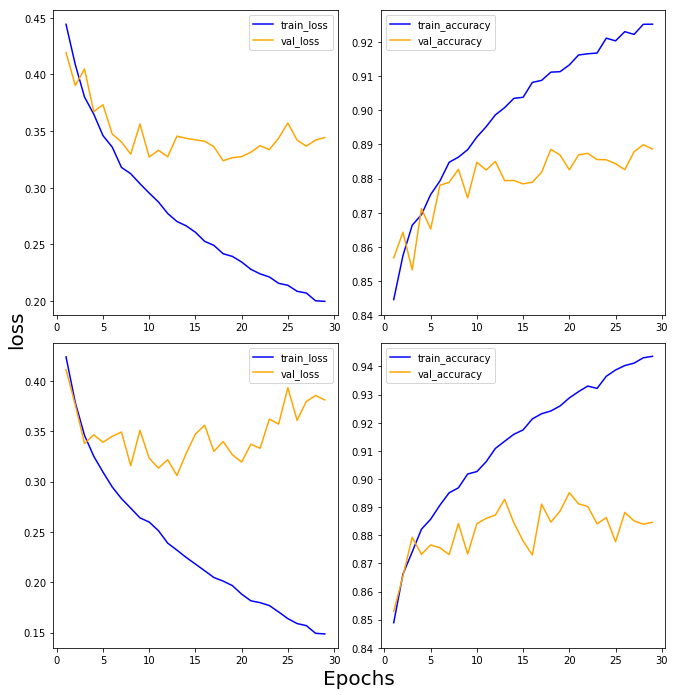

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], 
                     color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], 
                     color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc(first_history, second_history, 30)

모델 평가하기

In [17]:
print(first_model.evaluate(x_test, y_test))
print(second_model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.3789 - accuracy: 0.8780
[0.3788823187351227, 0.878000020980835]
313/313 [==============================] - 0s 1ms/step - loss: 0.4073 - accuracy: 0.8796
[0.40726178884506226, 0.8795999884605408]


모델 예측해서 그려보기

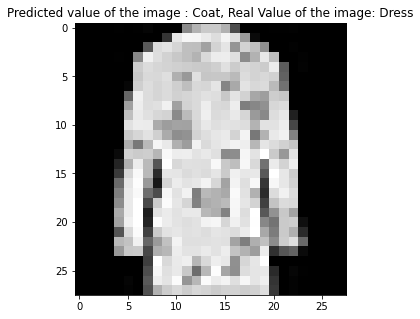

In [25]:
import numpy as np

results = first_model.predict(x_test)
np.set_printoptions(precision=7) # numpy 소수점 제한

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.

import matplotlib.pyplot as plt

sample_size = 10
# 0 ~ 9999의 범위에서 무작위로 정수를 뽑습니다.
random_idx = np.random.randint(10000) 

plt.figure(figsize = (5, 5))
plt.imshow(x_test[random_idx], cmap = 'gray')
plt.title('Predicted value of the image : ' 
          + class_names[arg_results[random_idx]] 
          + ', Real Value of the image: '+class_names[real_y_test[random_idx]])
plt.show()